In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# DFT of Sinusoid

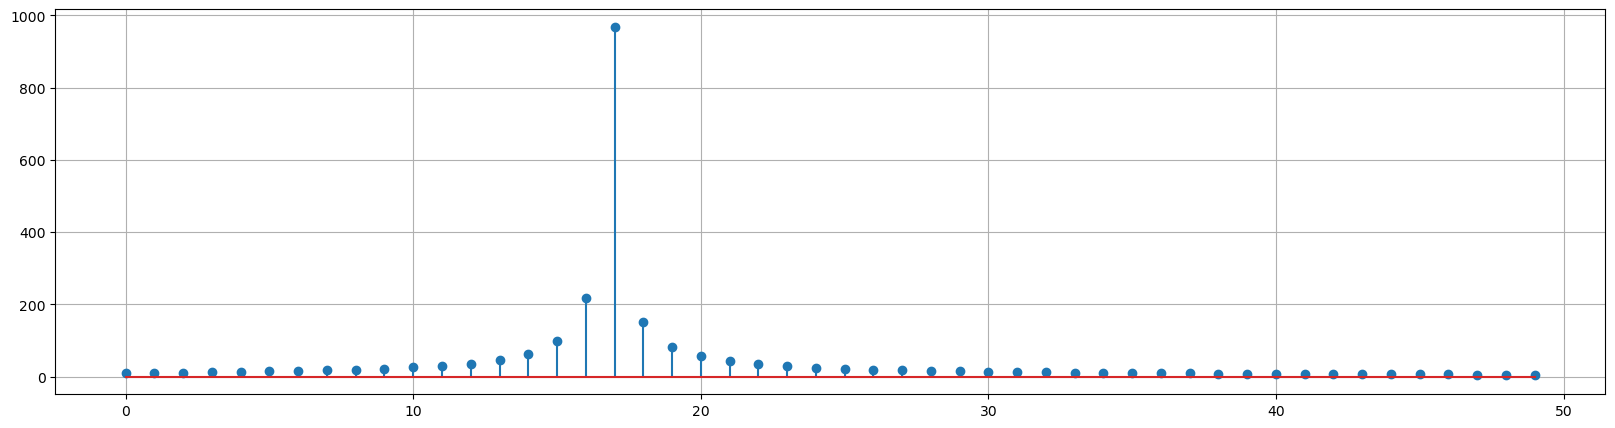

In [2]:

f0 = 261
fs = 8000
dur = 2

x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs);

win_size = 2048
FFT_size = 2048

x_seg = x[:win_size]

X= np.fft.fft(x_seg)

X_mag = np.abs(X)
X_phs = np.angle(X)

X_mag2 = X_mag[50:100]


# plot linear scale
plt.figure(figsize=(20, 5))
plt.stem(X_mag2)
plt.grid(True)


# Zeropadding VS Large Window

Text(0.5, 1.0, 'Large Window')

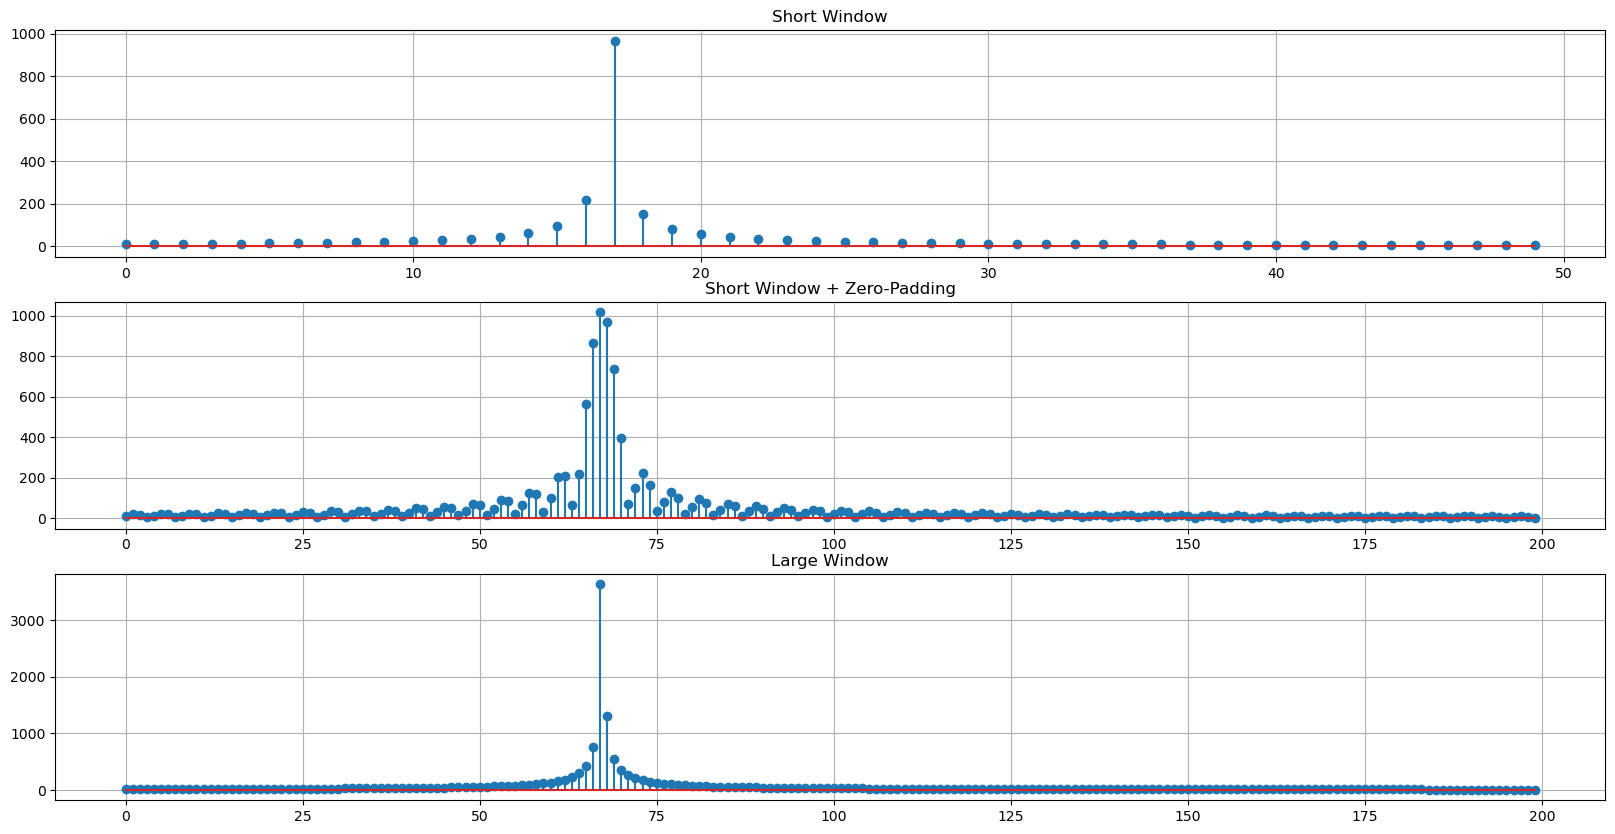

In [3]:
f0 = 261 
fs = 8000
dur = 2

x = np.sin(2*np.pi*f0*np.arange(dur*fs)/fs);

win_size = 2048
win_size_large = 2048*4
FFT_size = 2048*4

# zero padding
x_seg = x[:win_size]
x_seg_zp = np.append(x_seg, np.zeros(FFT_size-win_size))
X_zp= np.fft.fft(x_seg_zp)
X_mag_zp = np.abs(X_zp)
X_phs_zp = np.angle(X_zp)

# take half the FFT vector
N2 = int((FFT_size/2)+1)
X_mag_zp2 = X_mag_zp[50*4:100*4]


# large window
x_seg_lw = x[:win_size_large]
X_lw= np.fft.fft(x_seg_lw)
X_mag_lw = np.abs(X_lw)
X_phs_lw = np.angle(X_lw)

# take half the FFT vector
N2 = (FFT_size/2)+1
X_mag_lw2 = X_mag_lw[50*4:100*4]

plt.figure(figsize=(20, 10))

plt.subplot(3,1,1)
plt.stem(X_mag2)
plt.grid(True)
plt.title('Short Window')

# plot sinusoid with zeropadding
plt.subplot(3,1,2)
plt.stem(X_mag_zp2)
plt.grid(True)
plt.title('Short Window + Zero-Padding')

# plot sinusoid with a large window
plt.subplot(3,1,3)
plt.stem(X_mag_lw2)
plt.grid(True)
plt.title('Large Window')


# Load audio files

In [4]:
filename = "../audio/095_Coffee_House_10s.wav"

# 22050Hz is the default sampling rate: resamples the input to 22050Hz
# Mono is the default number or channel: mix stereo to mono 

y, sr = librosa.load(filename) 
#y, sr = librosa.load(filename, sr=None) # use the native sampling rate
#y, sr = librosa.load(filename, sr=None, mono=False) # use the native sampling rate and native channels


print(y.shape)
print(sr)

ipd.Audio(y, rate=sr)


(221556,)
22050


# Display waveforms


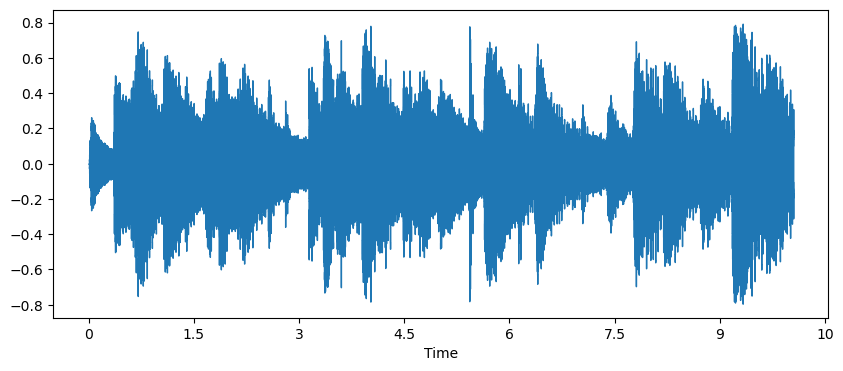

In [12]:
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)

# Compute spectrogram

In [7]:
hop_length = 512
n_fft = 2048
#Y = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
Y = librosa.stft(y, window='hann', n_fft=n_fft, hop_length=hop_length)

# magnitude compression: linear to dB
D = librosa.amplitude_to_db(np.abs(Y), ref=np.max)

# Display Spectrogram


Text(0.5, 1.0, 'Linear-frequency spectrogram')

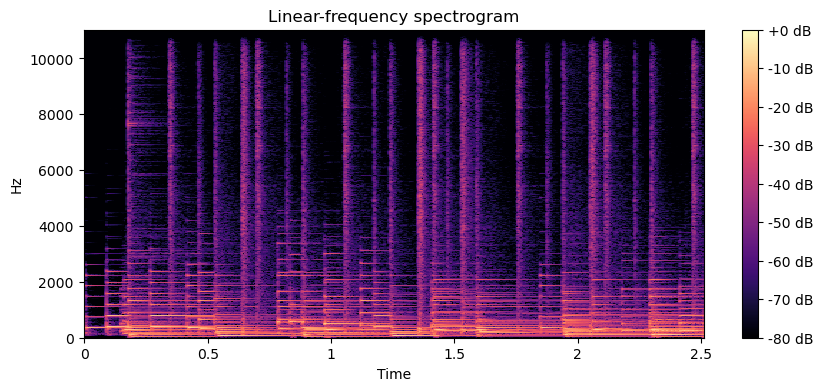

In [13]:
plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram')

# Spectrogram with different window lengths


Text(0.5, 1.0, 'Linear-frequency spectrogram (short window)')

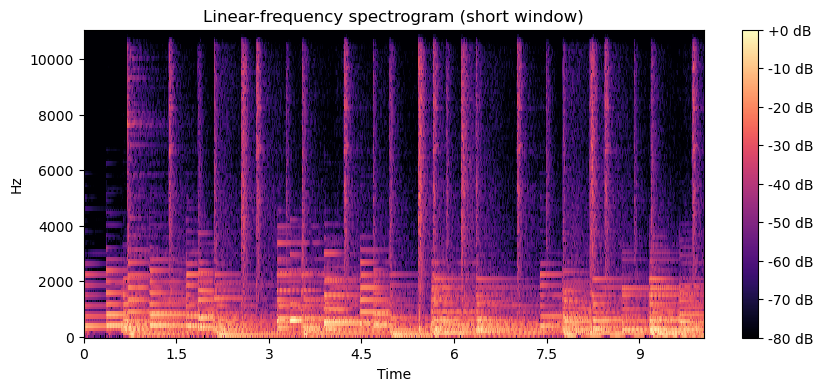

In [14]:
# short window
hop_length = 128
n_fft = 256

Y1 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D1 = librosa.amplitude_to_db(np.abs(Y1), ref=np.max)

plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D1, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (short window)')

Text(0.5, 1.0, 'Linear-frequency spectrogram (long window)')

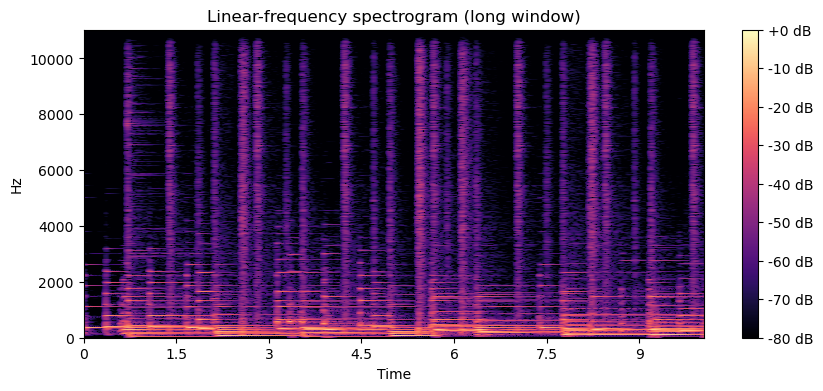

In [15]:
# long window
hop_length = 128
n_fft = 4096

Y2 = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)


plt.figure(figsize=(10, 4))

img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', hop_length=hop_length, sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency spectrogram (long window)')